##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

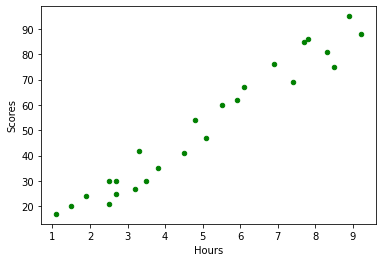

Współczynniki Beta=  [[9.71054094]]  Beta0 =  [2.79419668]
y_test: [[81 30 21 76 62 25 42 47]] 
y_pred: [[83.39168645 27.07054902 27.07054902 69.79692914 60.0863882  29.0126572
  34.83898177 52.31795545]]


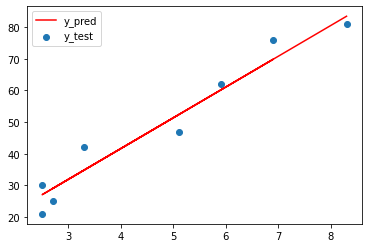

MAE: 4.499999999999998
MSE: 23.61945761415174
RMSE: 4.859985351228103


In [1]:
# 1. 
from sklearn import linear_model, model_selection, metrics
from patsy import dmatrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.
df = pd.read_csv("SCORES.csv")

# 3.
df.plot(kind="scatter", x="Hours", y="Scores", color="green")
plt.show()

# 4.
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.array(df["Hours"]), np.array(df["Scores"]), test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

# 5.
reg = linear_model.LinearRegression().fit(X_train, y_train)

# 6.        
print("Współczynniki Beta= ", reg.coef_, " Beta0 = ", reg.intercept_)

# 7.
y_pred = reg.predict(X_test) 
print("y_test:", y_test.reshape(1,-1), "\ny_pred:", y_pred.reshape(1,-1))

# 8.       
plt.figure() 
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.legend(["y_pred","y_test"])
plt.show()

# 9. 
print(f"MAE: {metrics.mean_absolute_error(y_pred, y_test)}")
print(f"MSE: {metrics.mean_squared_error(y_pred, y_test)}")
print(f"RMSE: {metrics.mean_squared_error(y_pred, y_test, squared=False)}")

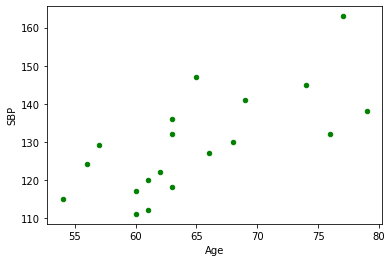

Współczynniki Beta=  [[1.44882707]]  Beta0 =  [36.17936475]
y_test: [[117 130 132 120 136 141]] 
y_pred: [[123.108989   134.69960556 146.29022213 124.55781607 127.45547021
  136.14843263]]


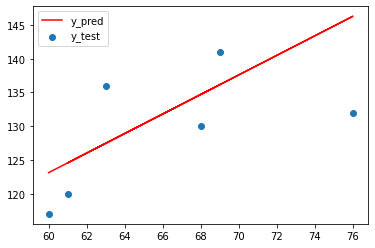

MAE: 7.175454985814123
MSE: 63.48947834957053
RMSE: 7.968028510840717


In [2]:
# 2.
df = pd.read_csv("SBP.csv")
df.head()

# 3.
df.plot(kind="scatter", x="Age", y="SBP", color="green")
plt.show()

# 4.
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.array(df["Age"]), np.array(df["SBP"]), test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)

# 5.
reg = linear_model.LinearRegression().fit(X_train, y_train)

# 6.        
print("Współczynniki Beta= ", reg.coef_, " Beta0 = ", reg.intercept_)

# 7.
y_pred = reg.predict(X_test) 
print("y_test:", y_test.reshape(1,-1), "\ny_pred:", y_pred.reshape(1,-1))

# 8.       
plt.figure() 
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.legend(["y_pred","y_test"])
plt.show()

# 9. 
print(f"MAE: {metrics.mean_absolute_error(y_pred, y_test)}")
print(f"MSE: {metrics.mean_squared_error(y_pred, y_test)}")
print(f"RMSE: {metrics.mean_squared_error(y_pred, y_test, squared=False)}")

ODP: Wyniki są mniej zadowalające ponieważ, dane wejściowe nie układają się w jednej lini tak bardzo jak w poprzednim przypadku 

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [20]:
df.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [26]:
df = pd.read_csv("PETROL.csv")
df.head()

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# 4.
X_train, X_test, y_train, y_test = model_selection.train_test_split(np.array(X), np.array(y), test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,4), X_test.reshape(-1,4), y_train.reshape(-1,1), y_test.reshape(-1,1)

# 5.
reg = linear_model.LinearRegression().fit(X_train, y_train)

# 6.        
print("Współczynniki Beta= ", reg.coef_, " Beta0 = ", reg.intercept_)

# 7.
y_pred = reg.predict(X_test) 
print("y_test:", y_test.reshape(1,-1), "\ny_pred:", y_pred.reshape(1,-1))
print("Score = ", reg.score(X_test, y_test))

# 9. 
print(f"MAE: {metrics.mean_absolute_error(y_pred, y_test)}")
print(f"MSE: {metrics.mean_squared_error(y_pred, y_test)}")
print(f"RMSE: {metrics.mean_squared_error(y_pred, y_test, squared=False)}")


Współczynniki Beta=  [[-3.99336011e+01 -4.53815410e-02 -4.95597538e-03  1.03711642e+03]]  Beta0 =  [513.1398382]
y_test: [[631 587 577 591 460 704 525 640 410 566 464 414 344 968 628]] 
y_pred: [[594.68473673 657.94626287 578.77796233 577.56584838 524.60050741
  632.85908374 575.96166242 649.04536273 556.09293684 525.54298676
  497.98650117 529.61281259 361.20860179 714.01098433 608.17110324]]
Score =  0.6158856157306212
MAE: 63.02652446557458
MSE: 8076.669020354715
RMSE: 89.87028997591315


ODP: Uzyskane wyniki są dość niezadowalające, zapewne jest to spowodowane przez zbyt małą liczbę danych

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [53]:
df.describe()
# df.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,47.770115,0.735632,3.003831,132.639847,248.823755,0.072797,0.226054,139.226054,0.318008,0.612261,0.375479
std,7.842244,0.441843,0.970718,17.709857,65.667985,0.260302,0.470935,23.757401,0.466597,0.931914,0.485177
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,242.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,280.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [60]:
# 1)
from sklearn import linear_model, model_selection, metrics, preprocessing
from patsy import dmatrices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2)
df = pd.read_csv("HEART.csv")

# 3)
df.replace("?", np.nan, inplace=True)

df.drop(columns=["slope", "ca", "thal"], axis=1, inplace=True)
df.dropna(inplace=True)

# 4)
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column])

# 5)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(np.array(X), np.array(y), test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1, 10), X_test.reshape(-1, 10), y_train.reshape(-1,1), y_test.reshape(-1,1)

# 6)
reg = linear_model.LinearRegression().fit(X_train, y_train)

preprocessing.normalize(X_train, axis=1, copy=False)
X_test_std = preprocessing.normalize(X_test, axis=1, copy=True)
reg_std = linear_model.LinearRegression().fit(X_train, y_train)

# 7)
print("Niestandaryzowane: ", reg.score(X_test, y_test))
print("Standaryzowane: ", reg_std.score(X_test_std, y_test))

Niestandaryzowane:  0.4211185832963008
Standaryzowane:  0.413355550869294
